In [449]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
from attention.utils.utilities import *
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DETECT FACES ON GROUP IMAGE (splittmng image for better detection)

### Loading image

In [515]:
#image_name = "IMG_3288.jp2"
#image_path = os.path.join(os.path.expanduser('~'), "Desktop", "IMG_3288.jp2")
image_path = '/Users/noah/Desktop/images_lewagon/frame_33_4.png'

In [532]:
face = cv2_process(image_path)
#plt.imshow(image)

### Splitting in multiple crops

#### Defining number of crops along the axes

In [517]:
n_split_w = 1
n_split_h = 1

#### Cropping the image


In [518]:
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

### Generating bboxes and processing them 

#### Listing the bbox coordinates in the crops

In [519]:
# as per the crop coordinate system and the absolute coordinate system
bbox_crop_list = []
bbox_crop_list_absolute = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_absolute = reconstruct_coord(crop, coord_set)
    bbox_crop_list_absolute.append(coord_set_absolute)
bbox_crop_list_absolute

[[{'x1': 41, 'x2': 154, 'y1': -3, 'y2': 105}]]

#### Drawing the bbox on each crop 


In [520]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

#### Eliminating duplicate bboxes

In [521]:
bbox_list = bbox_merge(bbox_crop_list_absolute)
bbox_list

[{'x1': 41, 'x2': 154, 'y1': -3, 'y2': 105}]

## Generating final image output

#### Drawing the unique bboxes on the original image 

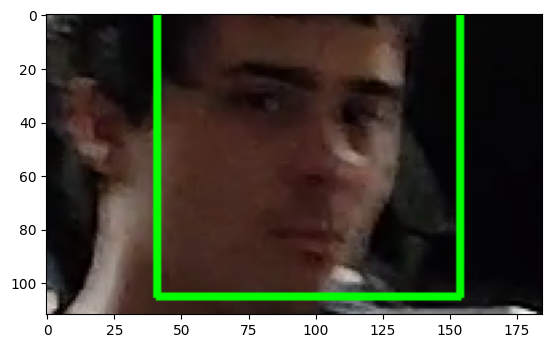

In [522]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

### Saving the image output

In [523]:
#image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)
#output_path = os.path.join(os.path.expanduser('~'), "Desktop")

#cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

# DETECTING EYES AND IRIS ON FACES

### Generating faces

In [530]:
faces = crop_faces(image, bbox_list)
face = faces[0]
#plt.imshow(face)


### Generating eye and iris landmarks for one face

#### Running face mesh model on the face

In [533]:
mp_landmarks = find_landmarks(face)

#### Drawing the face mesh on the face

In [534]:
face_annotated = output_face_landmarks(face, mp_landmarks)
#plt.imshow(face_annotated)

#### Converting the Mediapipe landmark to a standard system of coordinates

In [535]:
landmark_list = convert_landmarks(face, mp_landmarks)
landmark_list

[(48, 64),
 (44, 53),
 (45, 56),
 (43, 42),
 (44, 50),
 (45, 45),
 (47, 35),
 (29, 33),
 (48, 27),
 (48, 22),
 (50, 5),
 (48, 65),
 (48, 66),
 (48, 67),
 (48, 67),
 (48, 67),
 (48, 69),
 (48, 70),
 (45, 75),
 (44, 55),
 (42, 55),
 (21, 19),
 (37, 36),
 (34, 36),
 (31, 36),
 (28, 34),
 (39, 35),
 (32, 27),
 (35, 27),
 (29, 27),
 (27, 29),
 (26, 36),
 (35, 80),
 (28, 32),
 (19, 34),
 (23, 33),
 (32, 49),
 (44, 63),
 (44, 66),
 (40, 64),
 (38, 64),
 (41, 65),
 (39, 65),
 (33, 69),
 (42, 53),
 (42, 50),
 (23, 25),
 (39, 41),
 (36, 52),
 (37, 50),
 (24, 48),
 (42, 46),
 (28, 23),
 (24, 23),
 (23, 13),
 (41, 26),
 (38, 29),
 (31, 66),
 (21, 65),
 (39, 54),
 (41, 55),
 (35, 65),
 (35, 66),
 (23, 21),
 (36, 53),
 (33, 23),
 (32, 21),
 (33, 6),
 (24, 17),
 (34, 13),
 (21, 23),
 (21, 21),
 (44, 64),
 (41, 65),
 (38, 65),
 (39, 54),
 (35, 66),
 (37, 66),
 (36, 66),
 (39, 53),
 (39, 66),
 (42, 66),
 (45, 66),
 (42, 74),
 (44, 70),
 (44, 68),
 (45, 67),
 (45, 66),
 (39, 66),
 (39, 66),
 (39, 67),
 

#### Defining the landmarks we want to focus on

In [464]:
# GLOBAL PARAMS: LANDMARK INDICES
LEFT_EYE_EDGES =[362, 263]
RIGHT_EYE_EDGES =[33, 133]

LEFT_IRIS_CONTOUR = [474, 475, 476, 477]
RIGHT_IRIS_CONTOUR = [469, 470, 471, 472]

LEFT_IRIS_CENTER = [473]
RIGHT_IRIS_CENTER = [468]

In [465]:
# Indices of the landmarks we focus on
landmark_idx = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

In [466]:
# Extracting the coordinates of the landmarks we focus on
landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
landmark_focus_x

[(58, 35), (72, 33), (70, 32), (22, 38), (38, 37), (35, 37)]

### Generating final image output

#### Drawing the points on the face image

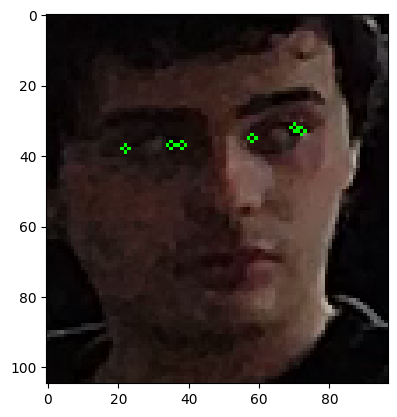

In [467]:
face_spec_lm = output_specific_landmarks(face, landmark_list, landmark_idx)
plt.imshow(face_spec_lm)

In [468]:
def left_detect_eye_direction(landmark_focus_x):
    # Calculate vector from left corner of left eye to right corner of left eye
    left_outside_x = landmark_focus_x[1][0]
    left_inside_corner_x= landmark_focus_x[0][0]
    left_eye_vector_x = left_outside_x - left_inside_corner_x 

    # Calculate position of left iris relative to left eye vector
    left_iris_x= landmark_focus_x[2][0]
    left_iris_vector_x = left_iris_x - left_inside_corner_x

    left_iris_position_relative_to_entire_eye = left_iris_vector_x / left_eye_vector_x

    if left_iris_position_relative_to_entire_eye < 0.63:
      return 'Looking straight'
    else:
      return 'Looking left'

left_detect_eye_direction(landmark_focus_x)


'Looking left'

In [469]:
def right_detect_eye_direction(landmark_focus_x):
    # Calculate vector from left corner of left eye to right corner of left eye
    right_inside_x = landmark_focus_x[4][0]
    right_outside_corner_x = landmark_focus_x[3][0]
    right_eye_vector_x = right_inside_x - right_outside_corner_x

    # Calculate position of right iris relative to right eye vector
    right_iris_x = landmark_focus_x[5][0]
    right_iris_vector_x = right_inside_x - right_iris_x
    
    right_iris_position_relative_to_entire_eye = right_iris_vector_x / right_eye_vector_x

    if right_iris_position_relative_to_entire_eye < 0.6:
      return 'Looking straight'
    else:
      return 'Looking right'
    
right_detect_eye_direction(landmark_focus_x)

'Looking straight'

In [470]:
def detect_attention(landmark_focus_x):
    left_eye = left_detect_eye_direction(landmark_focus_x)
    right_eye = right_detect_eye_direction(landmark_focus_x)

    if left_eye == right_eye:
        return 1  # attentive
    else:
        return 0  # inattentive
detect_attention(landmark_focus_x)

0

In [471]:
def left_calculate_iris_position(landmark_focus_x):
    # Calculate vector from left corner of eye to right corner of eye
    left_outside_x = landmark_focus_x[1][0]
    left_inside_corner_x= landmark_focus_x[0][0]
    left_eye_vector_x = left_outside_x - left_inside_corner_x 

    # Calculate position of left iris relative to left eye vector
    left_iris_x= landmark_focus_x[2][0]
    left_iris_vector_x = left_iris_x - left_inside_corner_x

    left_iris_position_relative_to_entire_eye = left_iris_vector_x / left_eye_vector_x
    
    return left_iris_position_relative_to_entire_eye

left_calculate_iris_position(landmark_focus_x)

0.8571428571428571

In [472]:
def right_calculate_iris_position(landmark_focus_x):
    # Calculate vector from left corner of left eye to right corner of left eye
    right_inside_x = landmark_focus_x[4][0]
    right_outside_corner_x = landmark_focus_x[3][0]
    right_eye_vector_x = right_inside_x - right_outside_corner_x

    # Calculate position of right iris relative to right eye vector
    right_iris_x = landmark_focus_x[5][0]
    right_iris_vector_x = right_inside_x - right_iris_x
    
    right_iris_position_relative_to_entire_eye = right_iris_vector_x / right_eye_vector_x

    return right_iris_position_relative_to_entire_eye

right_calculate_iris_position(landmark_focus_x)

0.1875

### FOR LOOP TO TEST PARAMS

In [556]:
def process_image(image_paths):
    results = []
    
    for image_path in image_paths:
        attention_score = -1
        face = cv2_process(image_path)
        mp_landmarks = find_landmarks(face)

        if mp_landmarks:
            landmark_list = convert_landmarks(face, mp_landmarks)

            LEFT_EYE_EDGES = [362, 263]
            RIGHT_EYE_EDGES = [33, 133]

            LEFT_IRIS_CENTER = [473]
            RIGHT_IRIS_CENTER = [468]

            landmark_idx = LEFT_EYE_EDGES + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

            landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]
        

            attention_score = detect_attention(landmark_focus_x)

            left_eye = left_detect_eye_direction(landmark_focus_x)
            left_iris_position_relative_to_entire_eye = left_calculate_iris_position(landmark_focus_x)
            right_eye = right_detect_eye_direction(landmark_focus_x)
            right_iris_position_relative_to_entire_eye = right_calculate_iris_position(landmark_focus_x)

            if left_eye is not None and right_eye is not None and left_eye == right_eye:
                results.append((image_path, str(left_eye), str(left_iris_position_relative_to_entire_eye), str(right_eye), str(right_iris_position_relative_to_entire_eye), attention_score))
            else:
                results.append((image_path, str(left_eye), str(left_iris_position_relative_to_entire_eye), str(right_eye), str(right_iris_position_relative_to_entire_eye), attention_score))

    return results

In [557]:
import os

directory_path = "/Users/noah/Desktop/images_lewagon/"

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    
    # Check if the file is an image file (you can add more extensions as needed)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        
        # Construct the full file path
        image_path = os.path.join(directory_path, filename)
        
        # Process the image and get the results
        results = process_image([image_path])
        
        print(results)


[('/Users/noah/Desktop/images_lewagon/frame_33_4.png', 'Looking straight', '0.35714285714285715', 'Looking right', '0.6111111111111112', 0)]
[('/Users/noah/Desktop/images_lewagon/frame_8_1.png', 'Looking straight', '0.3', 'Looking right', '0.625', 0)]
[('/Users/noah/Desktop/images_lewagon/frame_11_3.png', 'Looking straight', '0.36363636363636365', 'Looking right', '0.6', 0)]
[('/Users/noah/Desktop/images_lewagon/frame_37_0.png', 'Looking straight', '0.5714285714285714', 'Looking straight', '0.5714285714285714', 1)]
[('/Users/noah/Desktop/images_lewagon/IMG_20230309_103423_4.jpg', 'Looking straight', '0.5555555555555556', 'Looking straight', '0.4838709677419355', 1)]
[('/Users/noah/Desktop/images_lewagon/frame_13_1.png', 'Looking straight', '0.4444444444444444', 'Looking straight', '0.42857142857142855', 1)]
[('/Users/noah/Desktop/images_lewagon/frame_35_2.png', 'Looking straight', '0.5714285714285714', 'Looking right', '0.6666666666666666', 0)]
[('/Users/noah/Desktop/images_lewagon/fra

In [558]:
def test_iris(face: np.ndarray, face_landmarks: list[tuple], prediction_left: str, score_left: float, prediction_right: str, score_right: float, attention_score):
    '''Takes a face image and returns a copy of the image with the drawing of the landmarks listed with (x, y) coordinates'''
    face_annotated = face.copy()
    (h,w) = face_annotated.shape[:2]
    expected_width = 500
    ratio = expected_width / w
    face_annotated = cv2.resize(face_annotated, (expected_width, int(h * ratio)))
    face_landmarks_resized = list((np.array(face_landmarks) * ratio).astype(int))
    #LEFT EYE PREDICTION
    landmark_idx_left = LEFT_EYE_EDGES  + LEFT_IRIS_CENTER
    landmark_focus_left = [tuple(face_landmarks_resized[idx]) for idx in landmark_idx_left]
    for landmark in landmark_focus_left:
        cv2.circle(face_annotated, landmark, radius=3, color=(0, 255, 0), thickness=-1)
    cv2.putText(face_annotated, f'score: {score_left:.2f}',
                (landmark_focus_left[-1][0], landmark_focus_left[-1][1] + 40),
                fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    cv2.putText(face_annotated, f'{prediction_left}',
            (landmark_focus_left[-1][0], landmark_focus_left[-1][1] + 80),
            fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    #RIGHT EYE PREDICTION
    landmark_idx_right = RIGHT_EYE_EDGES  + RIGHT_IRIS_CENTER
    landmark_focus_right = [tuple(face_landmarks_resized[idx]) for idx in landmark_idx_right]
    for landmark in landmark_focus_right:
        cv2.circle(face_annotated, landmark, radius=3, color=(0, 255, 0), thickness=-1)
    cv2.putText(face_annotated, f'score: {score_right:.2f}',
                (landmark_focus_right[0][0], landmark_focus_right[0][1] + 40),
                fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    cv2.putText(face_annotated, f'{prediction_right}',
            (landmark_focus_right[0][0], landmark_focus_right[0][1] + 80),
            fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    cv2.putText(face_annotated, f'attention = {attention_score}',
            (landmark_focus_right[0][0], landmark_focus_right[0][1] + 150),
            fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.7, color = (250,225,100))
    
    return face_annotated

In [559]:
def process_image_and_save_results(image_paths, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for image_path in image_paths:
        attention_score = -1
        face = cv2_process(image_path)
        mp_landmarks = find_landmarks(face)

        if mp_landmarks:
            landmark_list = convert_landmarks(face, mp_landmarks)

            LEFT_EYE_EDGES = [362, 263]
            RIGHT_EYE_EDGES = [33, 133]

            LEFT_IRIS_CENTER = [473]
            RIGHT_IRIS_CENTER = [468]

            landmark_idx = LEFT_EYE_EDGES + LEFT_IRIS_CENTER + RIGHT_EYE_EDGES + RIGHT_IRIS_CENTER

            landmark_focus_x = [landmark_list[idx] for idx in landmark_idx]

            attention_score = detect_attention(landmark_focus_x)

            left_eye = left_detect_eye_direction(landmark_focus_x)
            left_iris_position_relative_to_entire_eye = left_calculate_iris_position(landmark_focus_x)
            right_eye = right_detect_eye_direction(landmark_focus_x)
            right_iris_position_relative_to_entire_eye = right_calculate_iris_position(landmark_focus_x)

            # Construct the output file path
            filename = os.path.splitext(os.path.basename(image_path))[0]
            output_filename = f"{filename}_{i}.jpg"
            output_path = os.path.join(output_folder, output_filename)

            annotated_face = test_iris(face, landmark_list, left_eye, left_iris_position_relative_to_entire_eye, right_eye, right_iris_position_relative_to_entire_eye, attention_score)

            annotated_face_rgb = cv2.cvtColor(annotated_face, cv2.COLOR_BGR2RGB)

            cv2.imwrite(output_path, annotated_face_rgb)

    print(f"Results saved to {output_folder}")


In [560]:
directory_path = "/Users/noah/Desktop/images_lewagon/"
output_folder = "/Users/noah/Desktop/iris_annotated_images/"
image_paths = []

for filename in os.listdir(directory_path):
    # Check if the file is an image file (you can add more extensions as needed)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Construct the full file path
        image_path = os.path.join(directory_path, filename)
        image_paths.append(image_path)
    
process_image_and_save_results(image_paths, output_folder)


Results saved to /Users/noah/Desktop/iris_annotated_images/
